<a href="https://colab.research.google.com/github/daniel0406070/Data-SCI-basic/blob/master/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Is Bootstrapping?

Bootstrapping is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. This relates back to the original phrase because it belies the notion that the sample is only relying on smaller samples of itself to make calculations on, in order to draw conclusions for the larger population.

This method of bootstrapping does require a considerable amount of computational power, but most computers can easily handle that as long as sample sizes and iterations are kept to reasonable proportions. The main benefit is that bootstrapping saves a lot of time during the phase of conducting research when it is too difficult, time-consuming or costly to survey the entire population being looked at.

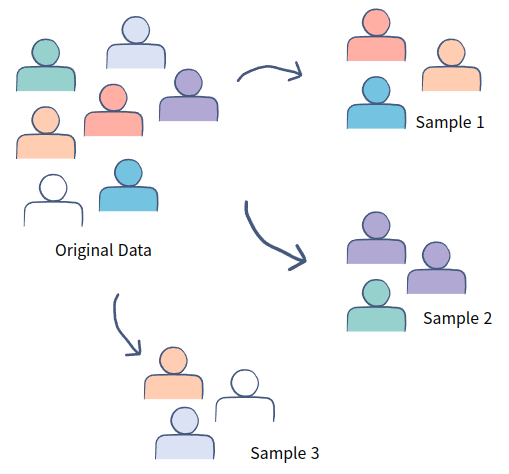

# Understanding Sampling With and Without Replacement

Sampling with replacement can be defined as random sampling that allows sampling units to occur more than once. Sampling with replacement consists of

1. A sampling unit (like a glass bead or a row of data) being randomly drawn from a population (like a jar of beads or a dataset).
2. Recording which sampling unit was drawn.
3. Returning the sampling unit to the population.



The reason why the sampling unit is returned to the population before the next sampling unit is drawn is to make sure the probability of selecting any particular sampling unit remains the same in future draws.

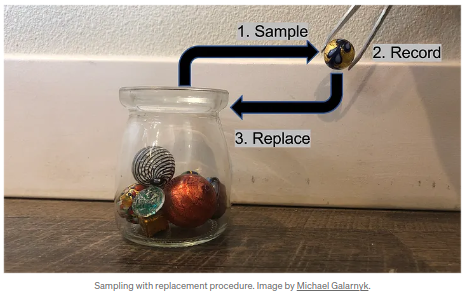

# Sampling with Replacement using NumPy



In [ ]:
import numpy as np
np.random.seed(3)
# a parameter: generate a list of unique random numbers (from 0 to 11)
# size parameter: how many samples we want (12)
# replace = True: sample with replacement
np.random.choice(a=12, size=12, replace=True)

array([10,  8,  9,  3,  8,  8,  0,  5,  3, 10, 11,  9])

# Sampling with Replacement using Pandas

he code below creates a bootstrapped dataset using Kaggle’s King County dataset which contains the price at which houses were sold for in King County, which includes Seattle between May 2014 and May 2015.

The code below uses pandas to show that a bootstrapped dataset will contain about 63.2% of the original rows.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
# Load dataset
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in
columns= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
# Only want to use 15 rows of the dataset for illustrative purposes.
df = df.head(15)
# Notice how we have 3 rows with the index label 8
df.sample(n = 15, replace = True, random_state=2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
8,3,1.00,1780,7470,1.0,229500.0
13,3,1.75,1370,9680,1.0,400000.0
8,3,1.00,1780,7470,1.0,229500.0
6,3,2.25,1715,6819,2.0,257500.0
11,2,1.00,1160,6000,1.0,468000.0
2,2,1.00,770,10000,1.0,180000.0
11,2,1.00,1160,6000,1.0,468000.0
8,3,1.00,1780,7470,1.0,229500.0
7,3,1.50,1060,9711,1.0,291850.0
2,2,1.00,770,10000,1.0,180000.0


How many duplicate samples/rows should you expect when sampling with replacement to create a bootstrapped dataset?

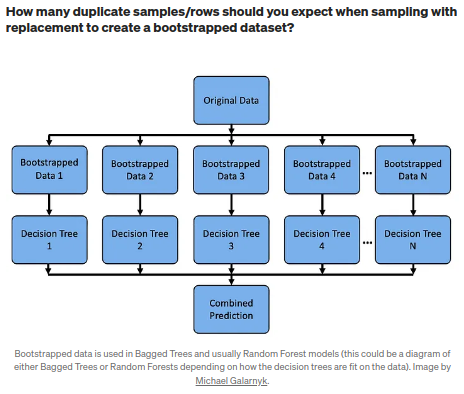

It is important to note that when you do sample with replacement to generate data you will likely get duplicate samples/rows.

In practice, **the average bootstrapped dataset contains about 63.2% of the original rows.**

다시말해, 전체 데이터셋의 36.8%는 부트스트랩 데이터 셋에 포함되지 않는다.

# Basic Statistics

Let’s start by deriving how for any particular row of data in the original dataset, 36.8% of the bootstrapped datasets will not contain that row.

Assume there are N rows of data in the original dataset. If you want to create a bootstrapped dataset, you need to sample with replacement N times.

For a SINGLE sample with replacement, the probability that a particular row of data is not randomly sampled with replacement from the dataset is

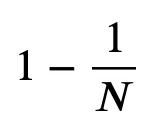

Since a bootstrapped dataset is obtained by sampling N times from a dataset of size N, we need to sample N times to find the probability that a particular row is not chosen in a given bootstrapped dataset.

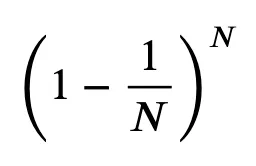

If we take the limit as N goes to infinity , we find that the probability is .368.

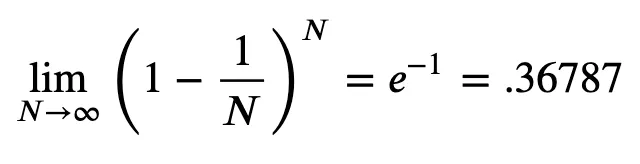

참고로....

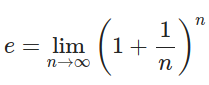

e=2.71828182845904523536⋯


The probability that any particular row of data from the original dataset would be in the bootstrapped dataset is just 1 — 𝑒^-1 = .63213. Note that in real life, the larger your dataset is (the larger N is), the more likely you will get close to these numbers.

In the bootstrap sample below, note that it contains about 63.2% of the original samples/rows. This is because the sample size was large (len(df) is 21613). This also means that each bootstrapped dataset will not include about 36.8% of the rows from the original dataset.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
# Load dataset
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in
columns= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
"""
Generate Bootstrapped Dataset (dataset generated with sample with replacement which has the same number of values as original dataset)
% of original rows will vary depending on random_state
"""
# df = df.head(15)

bootstrappedDataset = df.sample(frac = 1, replace = True, random_state = 2) # 모집단의 표본 개수 (100%, frac=1)

In [ ]:
len(df)

21613

In [ ]:
len(bootstrappedDataset.index.unique()) / len(df)

0.6317956785268126

# What is Sampling without Replacement

Sampling without replacement can be defined as random sampling that DOES NOT allow sampling units to occur more than once. Let’s now go over a quick example of how sampling without replacement works.

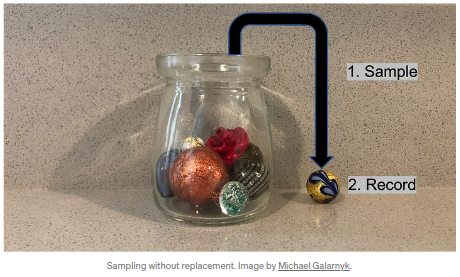

# Sampling without Replacement using NumPy

In [ ]:
import numpy as np
np.random.seed(3)
# a parameter: generate a list of unique random numbers (from 0 to 11)
# size parameter: how many samples we want (12)
# replace = False: sample without replacement
np.random.choice(a=12, size=12, replace=False)

array([ 5,  4,  1,  2, 11,  6,  7,  0,  3,  9,  8, 10])

In [ ]:
# 오류가 나는 상황!!
np.random.seed(3)
np.random.choice(a=12, size=20, replace=False)

ValueError: ignored

# Examples of Sampling without Replacement in Data Science

The image below shows the train test split procedure which consists of splitting a dataset into two pieces: a training set and a testing set. This consists of randomly sampling WITHOUT replacement about 75% (you can vary this) of the rows and putting them into your training set and putting the remaining 25% to your test set. Note that the colors in “Features” and “Target” indicate where their data will go (“X_train”, “X_test”, “y_train”, “y_test”) for a particular train test split.

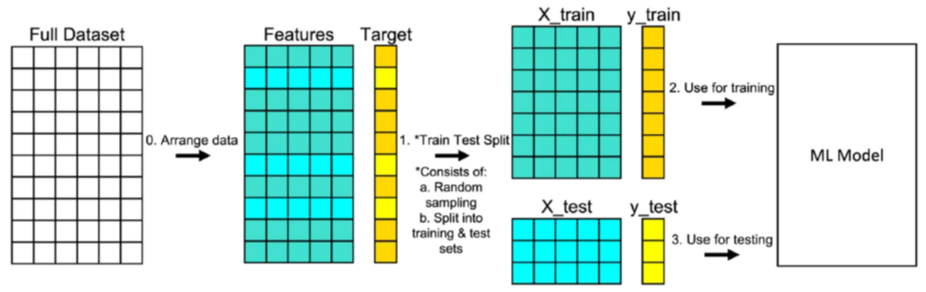

# Conclusion

Understanding the concept of sampling with and without replacement is important in statistics and data science. Bootstrapped data is used in machine learning algorithms like bagged trees and random forests as well as in statistical methods like bootstrapped confidence intervals, and more.